<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Artificial_Neural_Network_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

 Build and train a neural network to classify instances from a dataset using Keras, a high-level neural networks API.





Instructions
Dataset Options

Option 1: Iris Dataset

Description: This dataset consists of four features: sepal length, sepal width, petal length, and petal width. It is used for the classification of three Iris flower species.

Option 2: MNIST Dataset

Description: Comprises 28x28 pixel grayscale images of handwritten digits (0-9). This dataset is a good choice for those looking to work with image data, providing a balance of challenge and accessibility.

Data Loading and Preprocessing

General Steps:

Normalize feature data.

Encode categorical labels.

Split the data into training and testing sets.

For MNIST:

Reshape the 28x28 images into flat 784-pixel arrays.

Normalize pixel values to range between 0 and 1.

Convert labels into one-hot encoded vectors.

Optionally, create a validation set to aid in hyperparameter tuning.

Model Building

Configuration:

Input Layer: Adjust to match the number of input features (784 for MNIST, 4 for Iris).

Hidden Layers: Include at least one hidden layer with 'relu' activation.
Additional layers may be added to increase model complexity.

Output Layer: Use 'softmax' activation for Iris and 'sigmoid' for binary classification tasks like MNIST (if treated as binary).

Model Compilation

Optimizer: 'adam' for reliable performance across both datasets.

Loss Function: Use 'categorical_crossentropy' for multi-class tasks (both Iris and MNIST); 'binary_crossentropy' for binary classification.

Metrics: Focus on 'accuracy' as the primary metric.
Model Training

Train the model using the training data, while utilizing the validation set to monitor performance.

Adjust training parameters such as epochs and batch size based on validation outcomes.

Model Evaluation

Evaluate the model's performance using the test set.

Utilize detailed metrics such as the confusion matrix and classification report for more comprehensive insights.

In [2]:
# Importing necessary libraries for data handling, preprocessing, and model building
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# Loading the dataset
iris = load_iris()
X = iris.data          # 4 features
y = iris.target        # class labels (0,1,2)

# Preprocess the Data

In [4]:
# Normalize the Features using StandardScaler to standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Since this is multi-class classification, convert labels to one-hot encoding
y_onehot = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))

In [6]:
# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size=0.2, random_state=42, stratify=y
)


# Model Building

In [7]:
# We’ll make a simple feedforward network
# Input Layer: 4 neurons (one for each feature)
# Hidden Layer: 8 neurons with ReLU activation
# Output Layer: 3 neurons (since 3 classes) with softmax activation
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compiling the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Training the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=5,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6659 - loss: 0.8566 - val_accuracy: 0.5833 - val_loss: 0.6319
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7528 - loss: 0.6848 - val_accuracy: 0.6667 - val_loss: 0.5977
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7269 - loss: 0.7268 - val_accuracy: 0.6667 - val_loss: 0.5647
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 0.6820 - val_accuracy: 0.6667 - val_loss: 0.5368
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8616 - loss: 0.5739 - val_accuracy: 0.6667 - val_loss: 0.5141
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8107 - loss: 0.6264 - val_accuracy: 0.7500 - val_loss: 0.4933
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8165 - loss: 0.5557 - val_accuracy: 0.7500 - val_loss: 0.4731
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.5319 - val_accuracy: 0.7500 - val_loss

# Evaluating the model

In [12]:
# Evaluating model performance using test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8667 - loss: 0.2537
Test Loss: 0.2537
Test Accuracy: 0.8667


# Generating detailed metrics

In [13]:
# First, get the predicted classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [14]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  7  3]
 [ 0  1  9]]


In [15]:
# Classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=iris.target_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.70      0.78        10
   virginica       0.75      0.90      0.82        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



# Visualize Training History

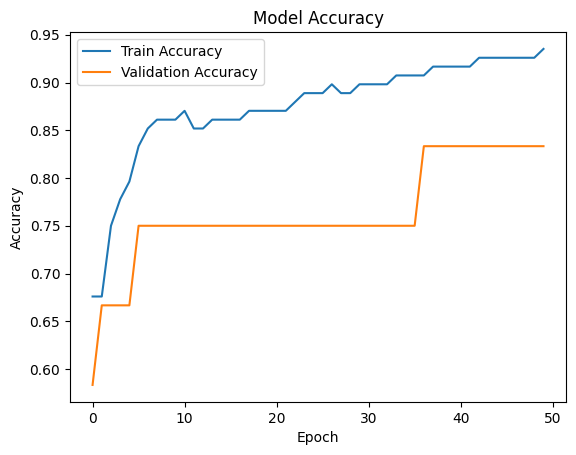

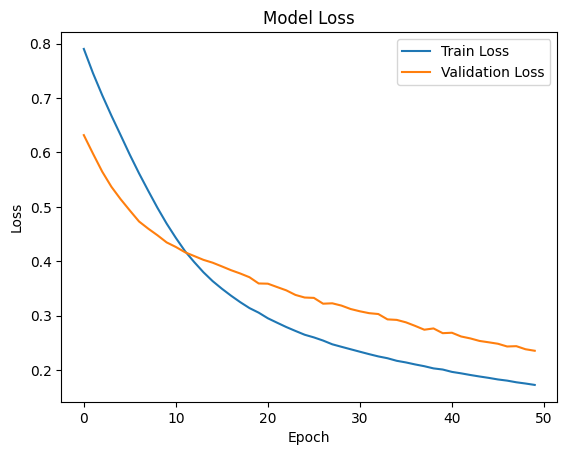

In [16]:
# Plot training vs. validation loss and accuracy
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()